### Imports

In [1]:
# Torch
import torch

# Torch Vision
import torchvision

# Path
from pathlib import Path

# Matplot
import matplotlib.pyplot as pp

### Pre-processing

In [19]:
def load(path = '.', transform = torchvision.transforms.ToTensor(), batch_size = 64, shuffle = True, num_workers = 10):
    '''
        Load dataset
        
        Parameters
        ----------
        
        path: str
            Dataset path
        
        transform: torchvision.transforms
            Transform function
        
        batch_size: int
            Batch size
        
        shuffle: bool
            Reshuffle data
        
        num_workers: int
            Subprocesses
            
        Usage
        -----
        
        >>> load()
        
        Return
        ------
        
        Data Loader object
        
        References
        ----------
        
        https://discuss.pytorch.org/t/how-to-load-png-using-dataloader/17079/2
        
        https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
        
        https://pytorch.org/docs/stable/torchvision/transforms.html
        
        https://github.com/marvis/pytorch-yolo2/issues/89
        
        https://discuss.pytorch.org/t/how-can-i-load-a-number-of-images/12468/8
    '''
    
    pth = Path(path)
    
    if not pth.exists() or not pth.is_dir():
        raise Exception('Incompatible path')
    
    return torch.utils.data.DataLoader(
        dataset=torchvision.datasets.ImageFolder(
            root=path,
            transform=transform
        ),
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=num_workers        
    )


def plot(axe, images, cmap = 'gray', title = '', color = False):
    '''
        Plot images
        
        Parameters
        ----------
        
        axe: matplotlib.pyplot.subplots
            Matplot buffer
        
        images: torch.tensor
            Tensor matrix
            
        cmap: str
            Color map
        
        title: str
            Matrix title
        
        color: bool
            RGB images
            
        Usage
        -----
        
        2D Images (gray)
        
        >>> fig, ax = pp.subplots(nrows=2, ncols=2, figsize=(2, 2))
        >>>
        >>> plot(ax, [torch.randn((4, 4)) for image in range(0, 4)])
        
        3D Images (rgb)
        
        >>> fig, ax = pp.subplots(nrows=2, ncols=2, figsize=(2, 2))
        >>>
        >>> plot(ax, [torch.randn((4, 4, 3)) for image in range(0, 4)], color = True)
        
        Return
        ------
        
        None
        
        References
        ----------
        
        https://matplotlib.org/examples/color/colormaps_reference.html
        
        https://matplotlib.org/api/axes_api.html
        
        http://matplotlib.1069221.n5.nabble.com/display-image-as-r-g-b-from-a-3xMxN-nympy-array-td2398.html
        
        https://stackoverflow.com/questions/53181846/matplotlib-plt-show-visual-glitch-when-pre-indexing-empty-numpy-array
        
        Observation
        -----------
        
        If the plot break happens, try to set `pp.ion()` or `%matplotlib inline`. The error 'clipping input data to the valid range
        for imshow with RGB data' ca be caused by some data normalization or corrupted / inexistent channels.
    '''
    
    count = 0
    
    for row in range(axe.shape[0]):
        for col in range(axe.shape[1]):
            if color:
                axe[row, col].imshow(images[count].numpy().transpose((1, 2, 0)))
            else:
                axe[row, col].imshow(images[count].numpy().squeeze(), cmap=cmap)
            
            axe[row, col].axis('off')
            
            if title:
                axe[row, col].set_title(title)
            
            count += 1

In [4]:
# Train dataset
height_train, width_train = 224, 224

transform_train = [
    torchvision.transforms.Resize((height_train, width_train)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0,485, 0,456, 0,406), std=(0,229, 0,224, 0,225))
]

# Train 1
train1 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(transform_train)
)

# Train 2
_train2 = transform_train.copy()

_train2.insert(1, torchvision.transforms.RandomRotation((30, 360)))

train2 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(_train2)
)

# Train 3
_train3 = transform_train.copy()

_train3.insert(1, torchvision.transforms.ColorJitter(brightness = 2.0, hue = 0.5, saturation = 0.5))

train3 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(_train3)
)

# Train 4
_train4 = transform_train.copy()

_train4.insert(1, torchvision.transforms.RandomCrop(size=(height_train / 2, width_train / 2)))

train4 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(_train4)
)

# Train 5
_train5 = transform_train.copy()

_train5.insert(1, torchvision.transforms.RandomHorizontalFlip(p = 1.0))

_train5.insert(2, torchvision.transforms.RandomVerticalFlip(p = 1.0))

train5 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(_train5)
)

# Train 6
_train6 = transform_train.copy()

_train6.insert(1, torchvision.transforms.RandomAffine((30, 360), fillcolor = 0))

train6 = load(
    path='../data/train',
    transform=torchvision.transforms.Compose(_train6)
)

# Concat datasets
train_vectors = [
    {'title': 'Original', 'data': train1},
    {'title': 'Rotation', 'data': train2},
    {'title': 'Brightness', 'data': train3},
    {'title': 'Crop', 'data': train4},
    {'title': 'Flip', 'data': train5},
    {'title': 'Affine', 'data': train6}
]

train = torch.utils.data.ConcatDataset([
    item['data'].dataset for item in train_vectors
])

print(f'Train dataset length: {len(train)}')

Train dataset length: 39312


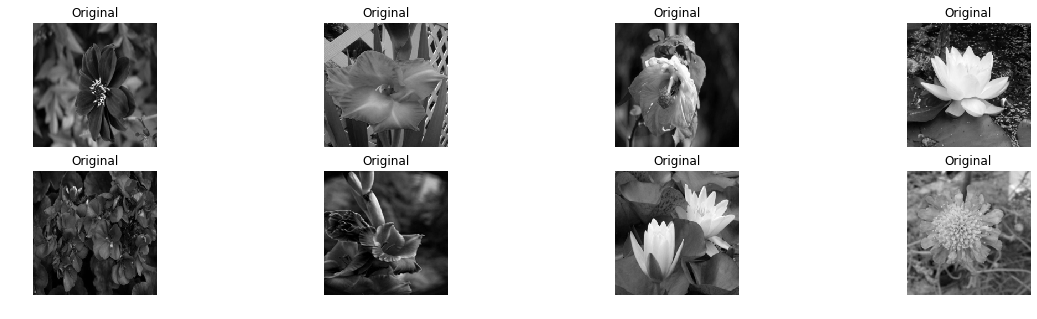

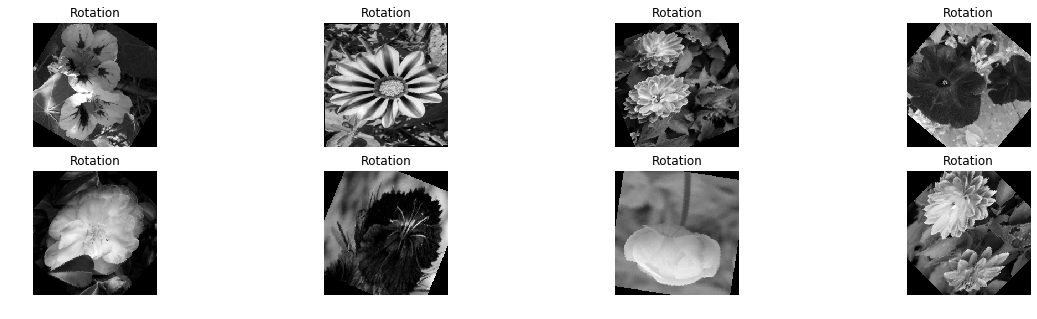

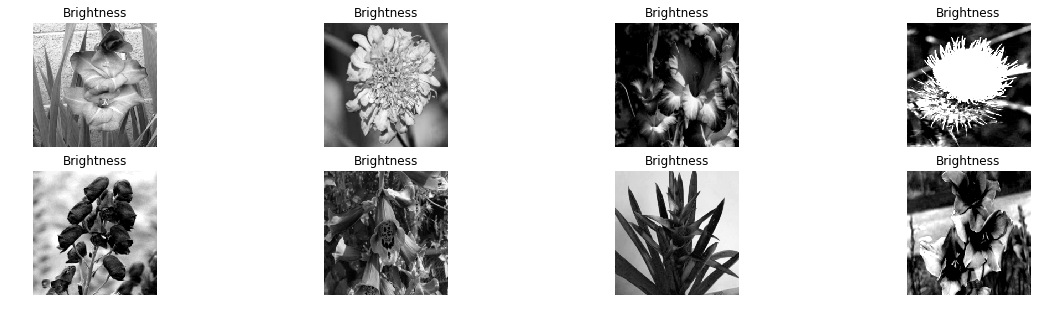

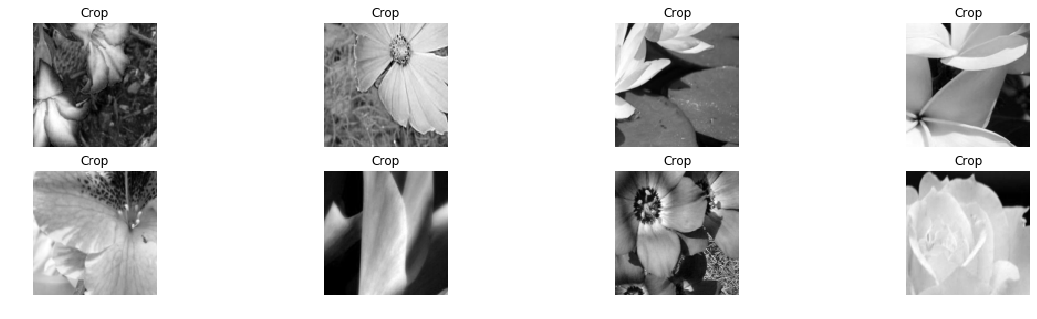

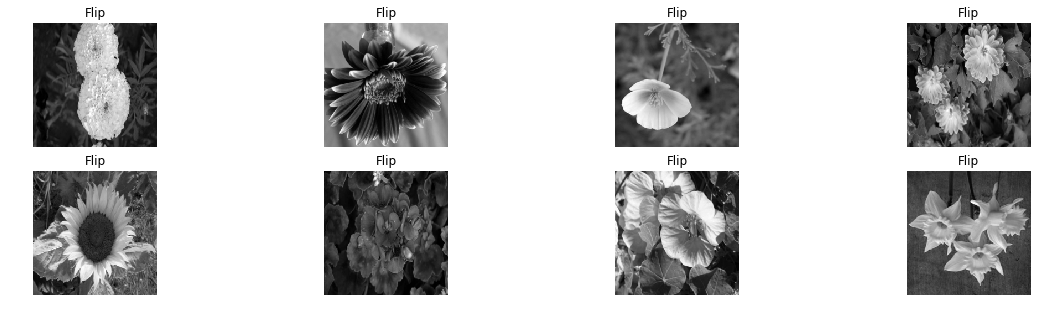

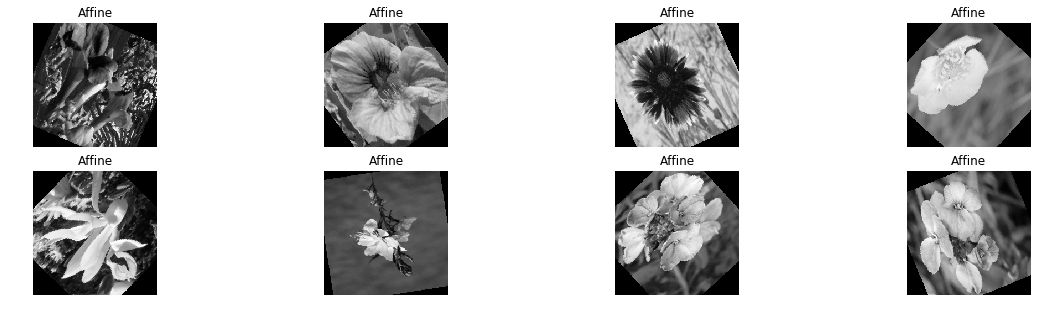

In [20]:
# Plot train dataset
%matplotlib inline

for item in train_vectors:
    # Get epoch
    images_train, labels_train = iter(item['data']).next()

    # Plot images
    figure, axe = pp.subplots(nrows=2, ncols=4, figsize=(20, 5))
    
    plot(axe = axe, images = images_train[:, 1], title = item['title'])

In [23]:
# Validation dataset
height_validation, width_validation = 224, 224

transform_validation = [
    torchvision.transforms.Resize((height_validation, width_validation)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0,485, 0,456, 0,406), std=(0,229, 0,224, 0,225))
]

# Validation
validation = load(
    path='../data/valid',
    transform=torchvision.transforms.Compose(transform_validation)
)

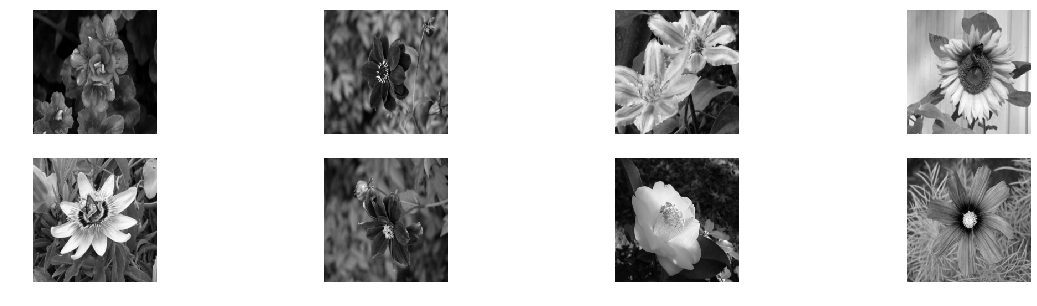

In [26]:
# Plot validation dataset
%matplotlib inline

dataiter = iter(validation)

images_validation, labels_validation = dataiter.next()

# Plot images
figure, axe = pp.subplots(nrows=2, ncols=4, figsize=(20, 5))

plot(axe = axe, images = images_valid[:, 1])